In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from geopy.geocoders import Nominatim

In [2]:
df = pd.read_csv("House_Rent_Train.csv")

In [3]:
df.head(5)

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,9/10/2017 12:48,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12/6/2018 22:02,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [4]:
pd.set_option('display.max_columns', None)
df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,9/10/2017 12:48,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12/6/2018 22:02,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,SEMI_FURNISHED,BOTH,1650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,1,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,1,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,0,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

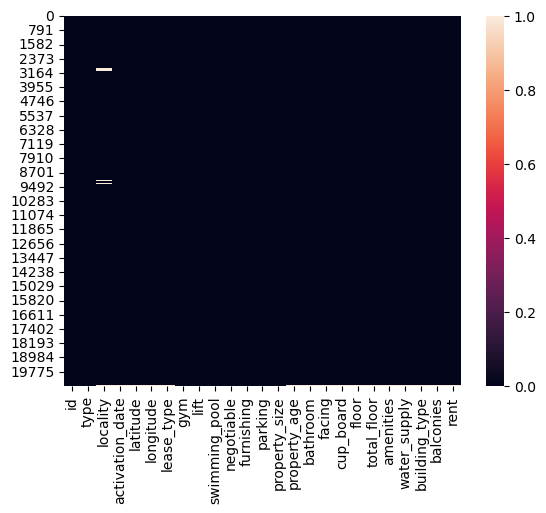

In [5]:
import seaborn as sns
sns.heatmap(df.isnull())

In [6]:
df.isna().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [7]:
df = df.drop("amenities", axis=1)

In [8]:
df.dropna(subset=["rent"], inplace=True)

In [9]:
df.dropna(subset=['locality','type'], inplace=True)

In [10]:
df['type'].unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS', '1BHK1', 'bhk2',
       'bhk3'], dtype=object)

In [11]:
mapping = {
    '1BHK1': 'BHK1',
    'bhk2': 'BHK2',
    'bhk3': 'BHK3',
    
}

# Replace values in 'QUANTITY UNIT' column based on the mapping
df['type'] = df['type'].replace(mapping)

# Check the unique values after renaming
print(df['type'].unique())

['BHK2' 'BHK3' 'BHK1' 'RK1' 'BHK4' 'BHK4PLUS']


In [12]:
df.shape

(20377, 24)

In [13]:
lat_unique = df['latitude'].nunique()
lat_unique

17625

In [14]:
long_unique = df['longitude'].nunique()
long_unique

17617

In [15]:
df_test = df.head()
df_test

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,9/10/2017 12:48,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12/6/2018 22:02,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,CORPORATION,IH,1.0,45000.0
5,ff8081815f48e4aa015f4dd1a9c6696b,BHK1,"Seetharampalya,Hoodi",24-10-2017 18:29,12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0.0,2.0,E,1.0,3.0,5.0,CORP_BORE,AP,2.0,18000.0


In [16]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="location_finder", timeout=20)

def get_location_info(row):
    try:
        location = geolocator.reverse((row['latitude'], row['longitude']), language='en')
        return location.address if location else None
    except GeocoderTimedOut:
        return "Timeout Error: geocoder timed out"

# Assuming 'df' is your DataFrame with columns 'latitude' and 'longitude'
df_test['location'] = df_test.apply(get_location_info, axis=1)


C:\Users\safyc\AppData\Local\Temp\ipykernel_27328\2763935151.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['location'] = df_test.apply(get_location_info, axis=1)


In [17]:
df_test

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,location
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,9/10/2017 12:48,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,CORPORATION,AP,2.0,22000.0,"Green Glen Layout, Bellanduru, Mahadevapura Zo..."
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12/6/2018 22:02,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,CORP_BORE,AP,3.0,28000.0,"Singapore Shoppe, 1st Seaward Road, Devendra N..."
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,CORPORATION,IH,0.0,8000.0,"14th D Main, BCC Layout, Attiguppe Ward, South..."
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,CORPORATION,IH,1.0,45000.0,"15th Main Road, Kodihalli, Jeevanbhima Nagar, ..."
5,ff8081815f48e4aa015f4dd1a9c6696b,BHK1,"Seetharampalya,Hoodi",24-10-2017 18:29,12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0.0,2.0,E,1.0,3.0,5.0,CORP_BORE,AP,2.0,18000.0,"Seetharampalya Road, Sitaramapalya, Garudachar..."


In [18]:
# pd.options.display.max_columns = None
df.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,9/10/2017 12:48,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12/6/2018 22:02,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,CORPORATION,IH,1.0,45000.0
5,ff8081815f48e4aa015f4dd1a9c6696b,BHK1,"Seetharampalya,Hoodi",24-10-2017 18:29,12.986196,77.718314,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0.0,2.0,E,1.0,3.0,5.0,CORP_BORE,AP,2.0,18000.0


In [19]:
col_to_remove = ["latitude", "longitude"]
df.drop(columns=col_to_remove, axis=1, inplace=True)

In [20]:
df.isna().sum()

id                 0
type               0
locality           0
activation_date    0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20377 entries, 1 to 20531
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20377 non-null  object 
 1   type             20377 non-null  object 
 2   locality         20377 non-null  object 
 3   activation_date  20377 non-null  object 
 4   lease_type       20377 non-null  object 
 5   gym              20377 non-null  int64  
 6   lift             20377 non-null  int64  
 7   swimming_pool    20377 non-null  int64  
 8   negotiable       20377 non-null  int64  
 9   furnishing       20377 non-null  object 
 10  parking          20377 non-null  object 
 11  property_size    20377 non-null  int64  
 12  property_age     20377 non-null  float64
 13  bathroom         20377 non-null  float64
 14  facing           20377 non-null  object 
 15  cup_board        20377 non-null  float64
 16  floor            20377 non-null  float64
 17  total_floor      

In [22]:
df.describe()

,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
count,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000
mean,0.226235,0.361142,0.174461,0.711488,1061.437209,5.777053,1.857732,4.567503,1.869510,3.798106,1.147863,19048.502969
std,0.418404,0.480344,0.379515,0.453081,591.857798,6.362450,0.710933,336.427053,2.181633,3.183849,0.993290,8433.444157
min,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000
25%,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12500.000000
50%,0.000000,0.000000,0.000000,1.000000,1044.000000,5.000000,2.000000,2.000000,1.000000,3.000000,1.000000,17500.000000
75%,0.000000,1.000000,0.000000,1.000000,1280.000000,10.000000,2.000000,3.000000,2.000000,4.000000,2.000000,24000.000000
max,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,21.000000,48026.000000,25.000000,26.000000,13.000000,50000.000000


C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='type', ylabel='property_size'>

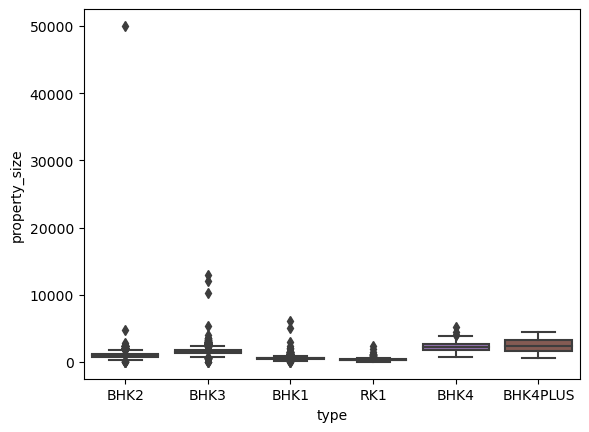

In [23]:
#outliers
sns.boxplot(x='type', y='property_size',data=df)

C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='type', ylabel='bathroom'>

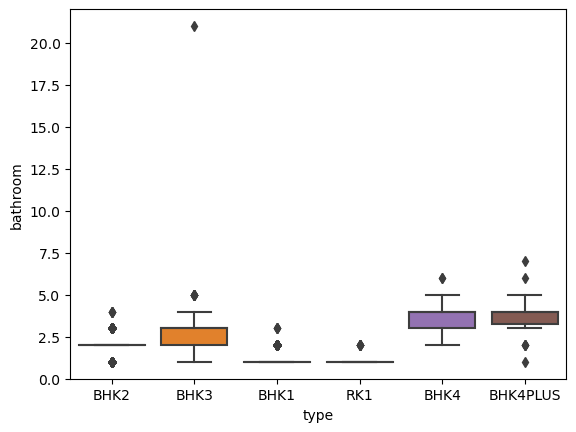

In [24]:
sns.boxplot(x='type', y='bathroom',data=df)

In [25]:
bathroom = df.loc[df['bathroom'] == 21]
bathroom

,id,type,locality,activation_date,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent
2431,ff808181647d728001647e549fa64e7d,BHK3,Ejipura,9/7/2018 15:52,BACHELOR,0,0,0,1,FULLY_FURNISHED,TWO_WHEELER,1100,5.0,21.0,NE,3.0,0.0,2.0,CORP_BORE,IH,13.0,27000.0


In [26]:
bhk3 = df.loc[df['type'] == 'BHK3']
bhk3.describe()
bhk3.shape

(4368, 22)

In [27]:
df.drop(df[df['bathroom']==21].index, inplace=True)

In [28]:
bhk3['bathroom'].unique()

array([ 3.,  2.,  1.,  4.,  5., 21.])

In [29]:
bhk4p = df.loc[df['type'] == 'BHK4PLUS']
bhk4p.describe()

,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.200000,0.166667,0.166667,0.733333,2496.666667,6.333333,3.800000,5.366667,0.933333,3.000000,1.800000,38483.333333
std,0.406838,0.379049,0.379049,0.449776,1022.371595,6.854816,1.214851,3.605392,1.779836,3.947937,1.374647,12334.758383
min,0.000000,0.000000,0.000000,0.000000,550.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000
25%,0.000000,0.000000,0.000000,0.250000,1650.000000,1.250000,3.250000,4.000000,0.000000,1.250000,1.000000,30000.000000
50%,0.000000,0.000000,0.000000,1.000000,2425.000000,4.500000,4.000000,5.000000,0.000000,2.000000,2.000000,40000.000000
75%,0.000000,0.000000,0.000000,1.000000,3190.000000,10.000000,4.000000,5.000000,1.000000,3.000000,2.750000,49500.000000
max,1.000000,1.000000,1.000000,1.000000,4500.000000,30.000000,7.000000,20.000000,9.000000,19.000000,5.000000,50000.000000


In [30]:
condition = (df['type'] == 'BHK4PLUS') & (df['bathroom'] > 5)

# Replace the 'bathroom' values with 5 where the condition is met
df.loc[condition, 'bathroom'] = 5

In [31]:
condition = (df['type'] == 'BHK4PLUS') & (df['bathroom'] < 3)

# Replace the 'bathroom' values with 5 where the condition is met
df.loc[condition, 'bathroom'] = 3

In [32]:
condition = (df['type'] == 'BHK4') & (df['bathroom'] > 4)

# Replace the 'bathroom' values with 5 where the condition is met
df.loc[condition, 'bathroom'] = 4

In [35]:
df.loc[df['balconies'] > 5, 'balconies'] = 5

In [37]:
bhk4 = df.loc[df['type'] == 'BHK4']
bhk4.describe()

,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,0.262931,0.198276,0.241379,0.801724,2286.849138,6.750000,3.504310,3.974138,1.383621,2.771552,1.887931,35709.051724
std,0.441177,0.399563,0.428845,0.399563,711.713054,6.610859,0.651325,1.782363,2.360257,3.129867,1.301159,9274.344586
min,0.000000,0.000000,0.000000,0.000000,700.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,16000.000000
25%,0.000000,0.000000,0.000000,1.000000,1800.000000,2.000000,3.000000,3.000000,0.000000,1.000000,1.000000,28000.000000
50%,0.000000,0.000000,0.000000,1.000000,2232.500000,5.000000,4.000000,4.000000,1.000000,2.000000,2.000000,35000.000000
75%,1.000000,0.000000,0.000000,1.000000,2666.250000,10.000000,4.000000,4.000000,2.000000,3.000000,3.000000,45000.000000
max,1.000000,1.000000,1.000000,1.000000,5215.000000,40.000000,4.000000,12.000000,14.000000,19.000000,5.000000,50000.000000


C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='type', ylabel='rent'>

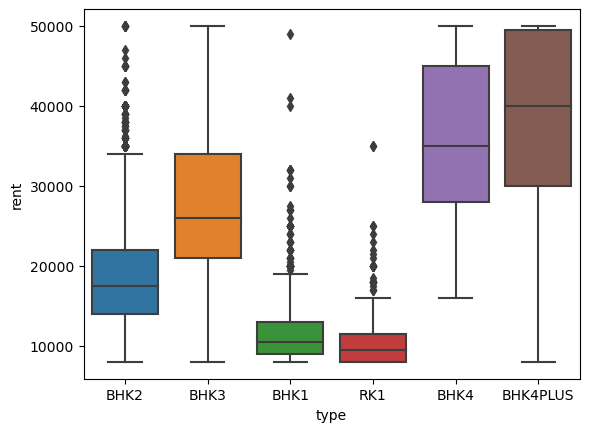

In [38]:
sns.boxplot(x='type', y='rent',data=df)

In [39]:
condition = (df['type'] == 'BHK1') & (df['rent'] > 16000)
df.loc[condition, 'rent'] = 10000
condition = (df['type'] == 'BHK2') & (df['rent'] > 34000)
df.loc[condition, 'rent'] = 22000
condition = (df['type'] == 'RK1') & (df['rent'] > 13000)
df.loc[condition, 'rent'] = 9000

C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='type', ylabel='rent'>

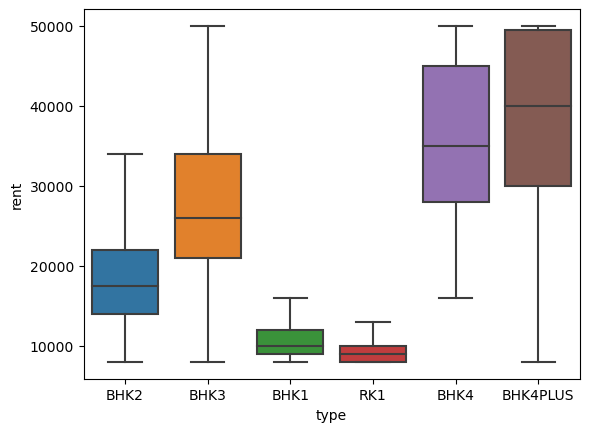

In [40]:
sns.boxplot(x='type', y='rent',data=df)

C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='type', ylabel='cup_board'>

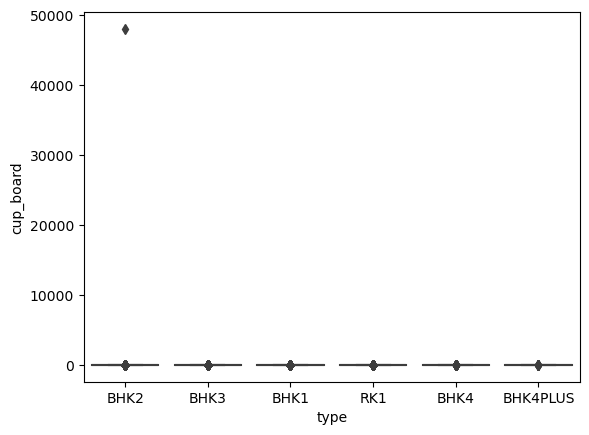

In [41]:
sns.boxplot(x='type', y='cup_board',data=df)

In [42]:
df.drop(df[df['cup_board']>=40].index, inplace=True)

C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='type', ylabel='cup_board'>

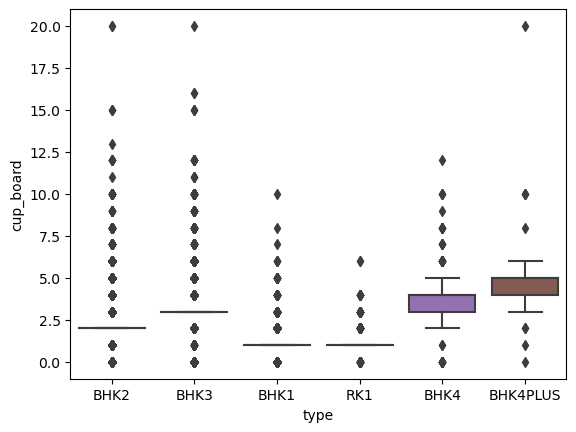

In [43]:
sns.boxplot(x='type', y='cup_board',data=df)

In [44]:
filtered_df = df.loc[df['property_size'] == 50000]
filtered_df

,id,type,locality,activation_date,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent
6075,ff808181634dc06801634e04b44a30cd,BHK2,Munnekollal,13-05-2018 19:40,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,50000,1.0,2.0,N,2.0,2.0,4.0,CORP_BORE,IF,0.0,16000.0


In [46]:
df.drop(df[df['property_size']==50000].index, inplace=True)

In [47]:
filtered_df1 = df.loc[df['rent'] == 50000]
filtered_df1

,id,type,locality,activation_date,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent
40,ff8081815d77d70c015d78c56a806ea7,BHK3,Kaikondrahalli,25-07-2017 13:58,ANYONE,1,1,1,1,FULLY_FURNISHED,BOTH,1876,1.0,3.0,N,5.0,3.0,9.0,CORPORATION,AP,4.0,50000.0
334,ff8081815e9979f8015e9a5b943079a3,BHK4,"Nagavarapalya,C V Raman Nagar",20-09-2017 17:26,ANYONE,1,1,1,1,SEMI_FURNISHED,BOTH,2330,8.0,4.0,E,4.0,1.0,5.0,CORP_BORE,AP,3.0,50000.0
759,ff8081815d7e42a6015d7e8c21aa2aa8,BHK3,Kasavanahalli,20-10-2017 15:28,FAMILY,1,0,1,0,SEMI_FURNISHED,BOTH,3400,4.0,3.0,N,3.0,1.0,2.0,CORP_BORE,AP,2.0,50000.0
886,ff8081815dfb5dec015e0390146124dc,BHK4PLUS,Kasavanahalli,6/4/2018 13:23,ANYONE,0,0,0,0,SEMI_FURNISHED,BOTH,3200,5.0,3.0,E,3.0,0.0,1.0,CORPORATION,IH,1.0,50000.0
1021,ff8081815de1bb03015dea6c55a85dc9,BHK3,Whitefield,4/10/2017 16:14,ANYONE,1,1,1,1,SEMI_FURNISHED,BOTH,3606,2.0,3.0,NE,3.0,0.0,3.0,CORP_BORE,IF,3.0,50000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18522,ff8081815f56e30b015f56e811600147,BHK3,HSR Layout,28-10-2017 16:36,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,2600,16.0,2.0,W,3.0,0.0,2.0,CORPORATION,IH,2.0,50000.0
19736,ff8081816306a4ae016307539294263c,BHK4,Jayanagar 5th Block,27-04-2018 20:41,COMPANY,0,0,0,1,SEMI_FURNISHED,BOTH,1800,15.0,3.0,N,4.0,0.0,0.0,CORP_BORE,IH,0.0,50000.0
19743,ff808181530247730153075b9b413f21,BHK3,Basavanagudi,23-04-2018 14:53,FAMILY,0,1,0,1,SEMI_FURNISHED,BOTH,2000,3.0,3.0,W,3.0,3.0,4.0,CORP_BORE,IF,2.0,50000.0
19782,ff8081816354aa090163599544dd5e42,BHK4,Jayanagar,13-05-2018 21:38,ANYONE,1,1,0,0,SEMI_FURNISHED,BOTH,3500,0.0,3.0,N,4.0,2.0,6.0,CORP_BORE,AP,2.0,50000.0


In [48]:
df["building_type"].unique()

array(['AP', 'IH', 'IF', 'GC'], dtype=object)

In [49]:
df['activation_date'] = pd.to_datetime(df['activation_date'], infer_datetime_format=True, errors='coerce')

C:\Users\safyc\AppData\Local\Temp\ipykernel_27328\799037751.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['activation_date'] = pd.to_datetime(df['activation_date'], infer_datetime_format=True, errors='coerce')


In [50]:
df.isna().sum()

id                     0
type                   0
locality               0
activation_date    11929
lease_type             0
gym                    0
lift                   0
swimming_pool          0
negotiable             0
furnishing             0
parking                0
property_size          0
property_age           0
bathroom               0
facing                 0
cup_board              0
floor                  0
total_floor            0
water_supply           0
building_type          0
balconies              0
rent                   0
dtype: int64

In [51]:
mode_activation_date = df['activation_date'].mode()[0]
df['activation_date'].fillna(mode_activation_date, inplace=True)

In [52]:
df.isna().sum()

id                 0
type               0
locality           0
activation_date    0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [53]:
import pandas as pd
from datetime import datetime
cur_date = datetime.now()
df['property_age']=(cur_date-df['activation_date']).dt.days
print(df[['activation_date', 'property_age']])

          activation_date  property_age
1     2017-09-10 12:48:00          2340
2     2018-12-06 22:02:00          1887
3     2017-04-11 18:11:00          2492
4     2017-04-11 18:11:00          2492
5     2017-04-11 18:11:00          2492
...                   ...           ...
20524 2017-11-10 17:08:00          2279
20528 2017-04-11 18:11:00          2492
20529 2017-04-11 18:11:00          2492
20530 2017-04-11 18:11:00          2492
20531 2018-08-07 22:31:00          2008

[20373 rows x 2 columns]


In [55]:
df.describe()

,activation_date,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
count,20373,20373.000000,20373.000000,20373.000000,20373.000000,20373.000000,20373.000000,20373.000000,20373.000000,20373.000000,20373.000000,20373.000000,20373.000000
mean,2017-08-16 06:25:59.779119360,0.226280,0.361213,0.174496,0.711432,1059.004859,2365.386590,1.855740,2.208855,1.869582,3.798262,1.146419,18753.001423
min,2017-01-07 10:25:00,0.000000,0.000000,0.000000,0.000000,1.000000,1886.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000
25%,2017-04-11 18:11:00,0.000000,0.000000,0.000000,0.000000,700.000000,2222.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12000.000000
50%,2017-04-11 18:11:00,0.000000,0.000000,0.000000,1.000000,1044.000000,2492.000000,2.000000,2.000000,1.000000,3.000000,1.000000,17000.000000
75%,2018-01-06 11:58:00,0.000000,1.000000,0.000000,1.000000,1280.000000,2492.000000,2.000000,3.000000,2.000000,4.000000,2.000000,23000.000000
max,2018-12-07 23:17:00,1.000000,1.000000,1.000000,1.000000,13000.000000,2586.000000,5.000000,20.000000,25.000000,26.000000,5.000000,50000.000000
std,NaN,0.418433,0.480364,0.379544,0.453108,482.437878,198.507682,0.692908,1.527423,2.181785,3.184111,0.984222,8302.284373


In [56]:
df['type'].unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS'], dtype=object)

In [57]:
df1 = df.copy()

In [58]:
df1['property_age_yrs']=round(df1['property_age']/365.25)

In [59]:
df1.drop(columns=['activation_date'], axis=1, inplace=True)

In [60]:
df1.head()

,id,type,locality,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,property_age_yrs
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,2340,2.0,NE,2.0,3.0,4.0,CORPORATION,AP,2.0,22000.0,6.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,1887,3.0,E,3.0,1.0,5.0,CORP_BORE,AP,3.0,28000.0,5.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,2492,1.0,E,1.0,1.0,2.0,CORPORATION,IH,0.0,8000.0,7.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,2492,3.0,E,4.0,0.0,0.0,CORPORATION,IH,1.0,45000.0,7.0
5,ff8081815f48e4aa015f4dd1a9c6696b,BHK1,"Seetharampalya,Hoodi",FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,2492,2.0,E,1.0,3.0,5.0,CORP_BORE,AP,2.0,10000.0,7.0


In [61]:
data=df1.copy()

In [62]:
numeric_columns = data.select_dtypes(include='number')
numeric_columns

,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent,property_age_yrs
1,0,1,0,1,1400,2340,2.0,2.0,3.0,4.0,2.0,22000.0,6.0
2,0,1,0,0,1350,1887,3.0,3.0,1.0,5.0,3.0,28000.0,5.0
3,0,0,0,1,600,2492,1.0,1.0,1.0,2.0,0.0,8000.0,7.0
4,0,0,0,1,1500,2492,3.0,4.0,0.0,0.0,1.0,45000.0,7.0
5,1,1,1,1,1080,2492,2.0,1.0,3.0,5.0,2.0,10000.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,0,1,0,1,850,2279,2.0,1.0,1.0,4.0,1.0,10000.0,6.0
20528,0,0,0,1,1000,2492,2.0,2.0,1.0,2.0,2.0,30000.0,7.0
20529,1,1,0,1,1000,2492,2.0,2.0,5.0,5.0,2.0,16000.0,7.0
20530,0,1,0,0,1000,2492,2.0,2.0,2.0,4.0,3.0,30000.0,7.0


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20373 entries, 1 to 20531
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20373 non-null  object 
 1   type              20373 non-null  object 
 2   locality          20373 non-null  object 
 3   lease_type        20373 non-null  object 
 4   gym               20373 non-null  int64  
 5   lift              20373 non-null  int64  
 6   swimming_pool     20373 non-null  int64  
 7   negotiable        20373 non-null  int64  
 8   furnishing        20373 non-null  object 
 9   parking           20373 non-null  object 
 10  property_size     20373 non-null  int64  
 11  property_age      20373 non-null  int64  
 12  bathroom          20373 non-null  float64
 13  facing            20373 non-null  object 
 14  cup_board         20373 non-null  float64
 15  floor             20373 non-null  float64
 16  total_floor       20373 non-null  float64
 17

In [64]:
data = data.apply(lambda x: x.astype(float) if pd.api.types.is_numeric_dtype(x) else x)

In [65]:
data.drop(['id','locality'], axis=1, inplace=True)

In [66]:
data.head()

,type,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,property_age_yrs
1,BHK2,ANYONE,0.0,1.0,0.0,1.0,SEMI_FURNISHED,BOTH,1400.0,2340.0,2.0,NE,2.0,3.0,4.0,CORPORATION,AP,2.0,22000.0,6.0
2,BHK3,FAMILY,0.0,1.0,0.0,0.0,SEMI_FURNISHED,BOTH,1350.0,1887.0,3.0,E,3.0,1.0,5.0,CORP_BORE,AP,3.0,28000.0,5.0
3,BHK1,FAMILY,0.0,0.0,0.0,1.0,SEMI_FURNISHED,TWO_WHEELER,600.0,2492.0,1.0,E,1.0,1.0,2.0,CORPORATION,IH,0.0,8000.0,7.0
4,BHK3,FAMILY,0.0,0.0,0.0,1.0,SEMI_FURNISHED,BOTH,1500.0,2492.0,3.0,E,4.0,0.0,0.0,CORPORATION,IH,1.0,45000.0,7.0
5,BHK1,FAMILY,1.0,1.0,1.0,1.0,SEMI_FURNISHED,BOTH,1080.0,2492.0,2.0,E,1.0,3.0,5.0,CORP_BORE,AP,2.0,10000.0,7.0


In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['type']=le.fit_transform(data['type'])
data['lease_type']=le.fit_transform(data['lease_type'])
data['furnishing']=le.fit_transform(data['furnishing'])
data['water_supply']=le.fit_transform(data['water_supply'])
data['facing']=le.fit_transform(data['facing'])
data['building_type']=le.fit_transform(data['building_type'])
data['parking']=le.fit_transform(data['parking'])

In [68]:
data.head()

,type,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,property_age_yrs
1,1,0,0.0,1.0,0.0,1.0,2,0,1400.0,2340.0,2.0,2,2.0,3.0,4.0,1,0,2.0,22000.0,6.0
2,2,3,0.0,1.0,0.0,0.0,2,0,1350.0,1887.0,3.0,0,3.0,1.0,5.0,2,0,3.0,28000.0,5.0
3,0,3,0.0,0.0,0.0,1.0,2,3,600.0,2492.0,1.0,0,1.0,1.0,2.0,1,3,0.0,8000.0,7.0
4,2,3,0.0,0.0,0.0,1.0,2,0,1500.0,2492.0,3.0,0,4.0,0.0,0.0,1,3,1.0,45000.0,7.0
5,0,3,1.0,1.0,1.0,1.0,2,0,1080.0,2492.0,2.0,0,1.0,3.0,5.0,2,0,2.0,10000.0,7.0


In [69]:
data.drop(columns=['property_age'], axis=1, inplace=True)

In [70]:
data["parking"].unique()

array([0, 3, 2, 1])

In [71]:
df['parking'].unique()

array(['BOTH', 'TWO_WHEELER', 'NONE', 'FOUR_WHEELER'], dtype=object)

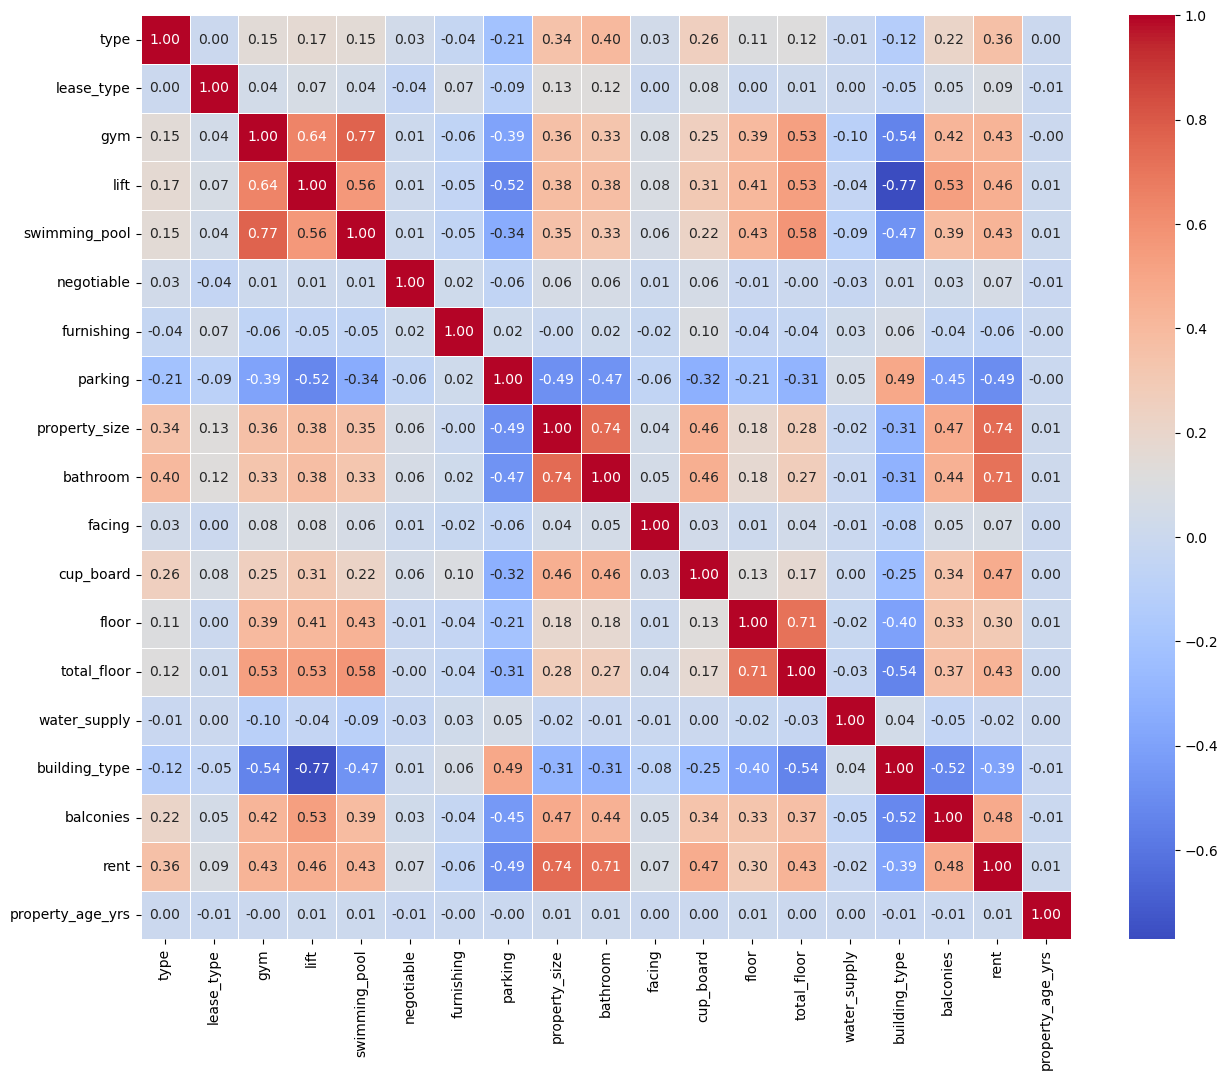

In [72]:
# import seaborn as sns
# sns.heatmap(data.corr(), annot=True)
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.show()

In [73]:
# Extract correlations with the 'Class' variable
correlations_with_class = correlation_matrix['rent'].sort_values(ascending=False)

# Show correlations with the 'Class' variable
print(correlations_with_class)

rent                1.000000
property_size       0.737710
bathroom            0.713221
balconies           0.480544
cup_board           0.469945
lift                0.456614
swimming_pool       0.429751
gym                 0.429078
total_floor         0.426253
type                0.360299
floor               0.299117
lease_type          0.085276
facing              0.067019
negotiable          0.065254
property_age_yrs    0.005388
water_supply       -0.016610
furnishing         -0.057284
building_type      -0.393639
parking            -0.494888
Name: rent, dtype: float64


In [74]:
data1 = data[["rent",'bathroom','property_size','balconies','lift','total_floor','swimming_pool','gym','type','floor','building_type','parking',]]
data1

,rent,bathroom,property_size,balconies,lift,total_floor,swimming_pool,gym,type,floor,building_type,parking
1,22000.0,2.0,1400.0,2.0,1.0,4.0,0.0,0.0,1,3.0,0,0
2,28000.0,3.0,1350.0,3.0,1.0,5.0,0.0,0.0,2,1.0,0,0
3,8000.0,1.0,600.0,0.0,0.0,2.0,0.0,0.0,0,1.0,3,3
4,45000.0,3.0,1500.0,1.0,0.0,0.0,0.0,0.0,2,0.0,3,0
5,10000.0,2.0,1080.0,2.0,1.0,5.0,1.0,1.0,0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20524,10000.0,2.0,850.0,1.0,1.0,4.0,0.0,0.0,0,1.0,0,3
20528,30000.0,2.0,1000.0,2.0,0.0,2.0,0.0,0.0,1,1.0,3,0
20529,16000.0,2.0,1000.0,2.0,1.0,5.0,0.0,1.0,1,5.0,0,0
20530,30000.0,2.0,1000.0,3.0,1.0,4.0,0.0,0.0,1,2.0,0,0


In [75]:
df_scaled = data1.copy()
df_scaled

,rent,bathroom,property_size,balconies,lift,total_floor,swimming_pool,gym,type,floor,building_type,parking
1,22000.0,2.0,1400.0,2.0,1.0,4.0,0.0,0.0,1,3.0,0,0
2,28000.0,3.0,1350.0,3.0,1.0,5.0,0.0,0.0,2,1.0,0,0
3,8000.0,1.0,600.0,0.0,0.0,2.0,0.0,0.0,0,1.0,3,3
4,45000.0,3.0,1500.0,1.0,0.0,0.0,0.0,0.0,2,0.0,3,0
5,10000.0,2.0,1080.0,2.0,1.0,5.0,1.0,1.0,0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20524,10000.0,2.0,850.0,1.0,1.0,4.0,0.0,0.0,0,1.0,0,3
20528,30000.0,2.0,1000.0,2.0,0.0,2.0,0.0,0.0,1,1.0,3,0
20529,16000.0,2.0,1000.0,2.0,1.0,5.0,0.0,1.0,1,5.0,0,0
20530,30000.0,2.0,1000.0,3.0,1.0,4.0,0.0,0.0,1,2.0,0,0


In [76]:
x = df_scaled.drop("rent", axis=1)
y = df_scaled["rent"]

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=30)

# Linear Regression

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming x and y are already defined
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

# Define the pipeline
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

# Fit the scaler only on the training data
pipeline.fit(x_train)

# Transform both the training and test data using the fitted scaler
x_train_scaled = pipeline.transform(x_train)
x_test_scaled = pipeline.transform(x_test)

# Instantiate the model
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 23803704.69309714
R^2 Score: 0.6658649575351052
Mean Absolute Error: 3610.120517799852


In [80]:
# Predict using the provided values
input_values = [[2, 1400, 2, 1, 4, 0, 0, 1, 3, 0, 0]]
input_values_scaled = pipeline.transform(input_values)
prediction = model.predict(input_values_scaled)
print(f"Predicted output: {prediction}")

Predicted output: [22141.3690001]


C:\Users\safyc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [81]:
import pickle
with open("rent_pkl","wb") as files:
    pickle.dump(model, files)

In [82]:
from IPython.display import FileLink

# Replace "rent_pkl" with the actual filename you want to download
FileLink(r'rent_pkl')


C:\Users\safyc\Guvi\Projects\House Rent Prediction\rent_pkl

In [83]:
import pickle
with open("pipeline_pkl","wb") as files:
    pickle.dump(pipeline, files)

In [84]:
from IPython.display import FileLink

# Replace "rent_pkl" with the actual filename you want to download
FileLink(r'pipeline_pkl')


C:\Users\safyc\Guvi\Projects\House Rent Prediction\pipeline_pkl

In [85]:
pred_df = pd.DataFrame({'Actual Value':y_test,"Predicted Value" : y_pred, 'Difference': y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
2114,16000.0,18323.851837,-2323.851837
4221,25000.0,17735.064133,7264.935867
5743,29000.0,27601.203416,1398.796584
15037,18500.0,16275.384275,2224.615725
10522,25000.0,19061.863530,5938.136470
...,...,...,...
198,24000.0,21237.581346,2762.418654
4888,10000.0,10861.443539,-861.443539
19560,15500.0,19314.240910,-3814.240910
9903,32000.0,23748.161921,8251.838079


# Decision Tree Regression

In [88]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model (Decision Tree Regressor)
decision_tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
decision_tree.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(x_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 39251570.36606138
R^2 Score: 0.4490216838019735
Mean Absolute Error: 4466.378473074696


In [106]:
input_values = [[2, 1400, 2, 1, 4, 0, 0, 1, 3, 0, 0]]
input_values_scaled = pipeline.transform(input_values)
prediction = decision_tree.predict(input_values_scaled)
print(f"Predicted output: {prediction}")

Predicted output: [22000.]


C:\Users\safyc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [90]:
import pickle
with open("rent_dt_pkl","wb") as files:
    pickle.dump(decision_tree, files)

In [91]:

from IPython.display import FileLink

# Replace "rent_pkl" with the actual filename you want to download
FileLink(r'rent_dt_pkl')

C:\Users\safyc\Guvi\Projects\House Rent Prediction\rent_dt_pkl

# Random Forest Regression

In [92]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model (Random Forest Regressor)
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(x_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 24564582.52158489
R^2 Score: 0.6551844374727773
Mean Absolute Error: 3638.333479735597


In [105]:
input_values = [[2, 1400, 2, 1, 4, 0, 0, 1, 3, 0, 0]]
input_values_scaled = pipeline.transform(input_values)
prediction = random_forest.predict(input_values_scaled)
print(f"Predicted output: {prediction}")

Predicted output: [22863.33333333]


C:\Users\safyc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [94]:
import pickle
with open("rent_rf_pkl","wb") as files:
    pickle.dump(random_forest, files)

In [95]:
from IPython.display import FileLink

# Replace "rent_pkl" with the actual filename you want to download
FileLink(r'rent_rf_pkl')

C:\Users\safyc\Guvi\Projects\House Rent Prediction\rent_rf_pkl

# Gradient Boosing

In [97]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model (Gradient Boosting Regressor)
grd_boost = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
grd_boost.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = grd_boost.predict(x_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 21649878.87959964
R^2 Score: 0.6960984312289573
Mean Absolute Error: 3435.3080535226823


In [104]:
input_values = [[2, 1400, 2, 1, 4, 0, 0, 1, 3, 0, 0]]
input_values_scaled = pipeline.transform(input_values)
prediction = grd_boost.predict(input_values_scaled)
print(f"Predicted output: {prediction}")

Predicted output: [21819.26027787]


C:\Users\safyc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Neural Networks

In [99]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [101]:
from sklearn.neural_network import MLPRegressor

# Instantiate the model (Multi-layer Perceptron Regressor)
nnt = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Fit the model on the training data
nnt.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = nnt.predict(x_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 23802650.52472736
R^2 Score: 0.6658797550045557
Mean Absolute Error: 3612.6570417317016


C:\Users\safyc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [103]:
# Predict using the provided values
input_values = [[2, 1400, 2, 1, 4, 0, 0, 1, 3, 0, 0]]
input_values_scaled = pipeline.transform(input_values)
prediction = nnt.predict(input_values_scaled)
print(f"Predicted output: {prediction}")

Predicted output: [21623.27256662]


C:\Users\safyc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
